# Data Dive: Exploring Stock Returns

The second part of today's exercise takes a look at stock data downloaded from [Yahoo Finance](https://finance.yahoo.com/lookup). Stock returns can translate to enormous swings of wealth, and thus have long been the subject of statistical analysis. Today we'll take a look at just a handful of properties of stock returns. The file linked below includes all available data for six stocks: AT&T (T), Apple (AAPL), Facebook (FB), General Electric (GE), IBM (IBM), and Microsoft (MSFT) and one index: the Dow Jones Industrial Average (DJIA).  

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Download Raw Data

In [2]:
raw_df = pd.read_csv('https://grantmlong.com/data/stocks2019.csv')
raw_df.set_index('Date', inplace=True)
print('Raw rows: %i' % raw_df.shape[0])
price_df = raw_df.dropna(axis=0)
print('Full rows: %i' % price_df.shape[0])
price_df.head()

Raw rows: 1259
Full rows: 1259


,T,DJIA,IBM,GOOG,AAPL,FB,GE,MSFT
Date,,,,,,,,
2/24/14,24.858921,16207.13965,150.323257,602.337402,66.643288,70.779999,21.400719,33.529079
2/25/14,24.629236,16179.66016,150.142944,606.058167,65.949753,69.849998,21.383795,33.395638
2/26/14,24.499090,16198.41016,150.823029,606.142639,65.354752,69.260002,21.409180,33.333370
2/27/14,24.675177,16272.65039,151.814590,605.665710,66.658447,68.940002,21.578424,33.680309
2/28/14,24.445496,16321.70996,151.732605,603.897217,66.477783,68.459999,21.553036,34.080639


##### Plot the five year price history for all of the stocks. Which has returned the most?

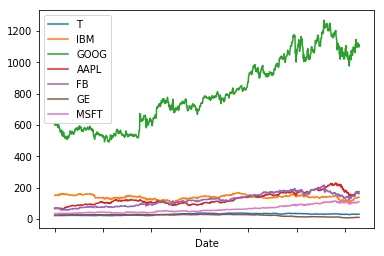

In [3]:
price_df[['T', 'IBM', 'GOOG', 'AAPL', 'FB', 'GE', 'MSFT']].plot()

In [4]:
price_df.iloc[-1] - price_df.iloc[1]  

T          6.520764
DJIA    9852.150390
IBM      -10.892944
GOOG     504.311828
AAPL     107.020248
FB        92.040001
GE       -11.213795
MSFT      77.574363
dtype: float64

In [5]:
(price_df.iloc[-1] - price_df.iloc[1]) /  price_df.iloc[1]

T       0.264757
DJIA    0.608922
IBM    -0.072550
GOOG    0.832118
AAPL    1.622754
FB      1.317681
GE     -0.524406
MSFT    2.322889
dtype: float64

#### Transform Prices to Returns

In [6]:
return_df = price_df.pct_change(periods=1).dropna(axis=0)
return_df.tail(10)

,T,DJIA,IBM,GOOG,AAPL,FB,GE,MSFT
Date,,,,,,,,
2/8/19,0.003396,-0.002511,0.003904,-0.003322,0.001175,0.005710,-0.024851,0.003800
2/11/19,0.005415,-0.002120,0.002094,-0.000046,-0.005751,-0.009203,0.022426,-0.003975
2/12/19,0.003366,0.014874,0.015374,0.024073,0.008617,-0.004524,-0.004985,0.015582
2/13/19,0.001006,0.004622,0.010805,-0.001079,-0.004155,-0.005877,0.039078,-0.000748
2/14/19,-0.001676,-0.004067,-0.007563,0.001348,0.003643,-0.000731,-0.031823,0.000843
2/15/19,0.022826,0.017448,0.011357,-0.007150,-0.002225,-0.008844,0.004980,0.012348
2/19/19,0.005251,0.000312,0.004854,0.004409,0.002993,-0.001292,0.003964,-0.000462
2/20/19,0.007183,0.002438,-0.005047,-0.004255,0.006435,0.001664,-0.002962,-0.005199
2/21/19,-0.000648,-0.004000,-0.001159,-0.015111,-0.005639,-0.015502,-0.006931,0.021092


### Part I: Visualize Returns

Look at the Build histograms for the returns for each of the stocks. What do the distributions of these stocks look like?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e758240>,
      dtype=object)

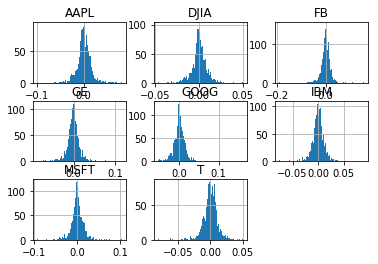

In [7]:
return_df.hist(bins=100)

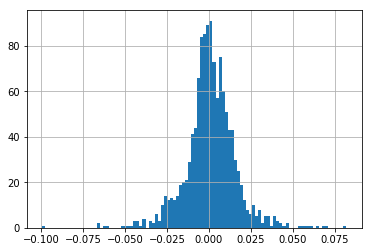

In [8]:
return_df.AAPL.hist(bins=100)

Which is has the highest average return? Which is the most volatile?

1. Identify and plot the summary statistics to answer each of these 
2. Are there other plots that might also be useful in illustrating these concepts?

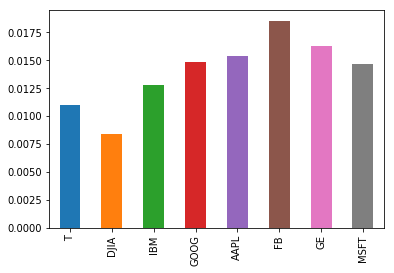

In [9]:
return_df.std().plot.bar()

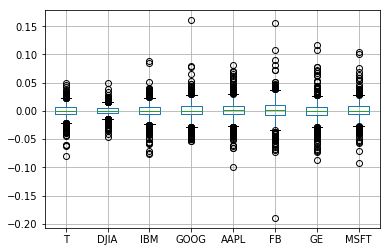

In [10]:
return_df.boxplot()

### Part II: Confidence Intervals

Based on this data, find the most you would lose on a \$10,000 investment with 95 percent and 99 percent confidence.
* Is it fair to call this a confidence interval?
* How else might you calculate such as confidence interval?
* [Time permitting] For the stocks with more data available, how does the inclusion of the historical returns change things?

In [11]:
return_df.quantile([0.01, 0.05])*10000

,T,DJIA,IBM,GOOG,AAPL,FB,GE,MSFT
0.01,-335.162396,-239.842625,-401.104251,-425.531626,-422.448295,-505.517474,-464.376434,-393.343431
0.05,-164.458084,-144.682606,-184.049460,-231.714088,-246.679581,-271.177208,-245.789480,-204.227371


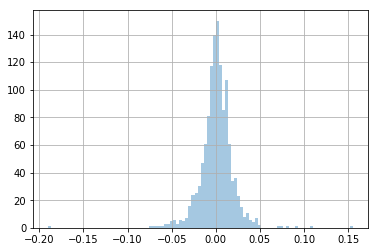

In [12]:
_ = return_df.FB.hist(bins=100, alpha=0.4)


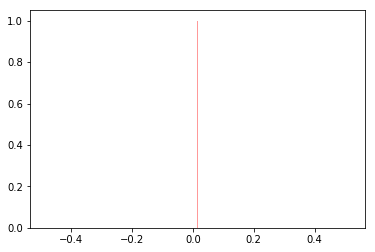

In [13]:
_ = plt.hist(np.random.normal(return_df.FB.mean(), return_df.FB.std()), len(return_df), color='red', alpha=0.4)
plt.show()

### Part III: Correlation

For each of the six stocks, which are most correlated with each other?
* Why might this be the case?
* Can we visualize these correlations?

For each of the six stocks, which are most correlated with the broader market index?
* How might we use the data?
* If we regress these returns against the market which has the biggest slope and intercept?

In [14]:
return_df[['FB', 'AAPL', 'GE', 'IBM', 'T', 'MSFT']].corr()

,FB,AAPL,GE,IBM,T,MSFT
FB,1.000000,0.433814,0.261472,0.276208,0.151163,0.474136
AAPL,0.433814,1.000000,0.267958,0.358979,0.232014,0.544993
GE,0.261472,0.267958,1.000000,0.361605,0.305148,0.284435
IBM,0.276208,0.358979,0.361605,1.000000,0.339983,0.465304
T,0.151163,0.232014,0.305148,0.339983,1.000000,0.274546
MSFT,0.474136,0.544993,0.284435,0.465304,0.274546,1.000000


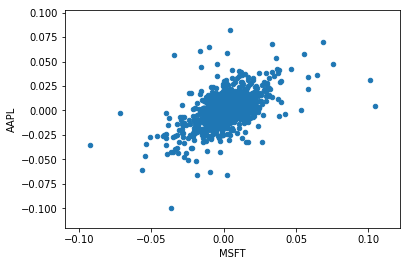

In [15]:
return_df.plot.scatter('MSFT', 'AAPL')

In [16]:
alpha_fb, beta_fb = np.polyfit(return_df['DJIA'].values, return_df['FB'].values, 1)
alpha_ibm, beta_ibm = np.polyfit(return_df['DJIA'].values, return_df['IBM'].values, 1)
alpha_aapl, beta_aapl = np.polyfit(return_df['DJIA'].values, return_df['AAPL'].values, 1)
alpha_ge, beta_ge = np.polyfit(return_df['DJIA'].values, return_df['GE'].values, 1)
alpha_t, beta_t = np.polyfit(return_df['DJIA'].values, return_df['T'].values, 1)
alpha_msft, beta_msft = np.polyfit(return_df['DJIA'].values, return_df['MSFT'].values, 1)

<BarContainer object of 6 artists>

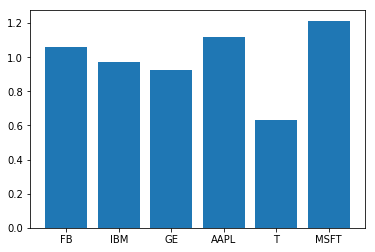

In [17]:
plt.bar(
    ['FB', 'IBM', 'GE', 'AAPL', 'T', 'MSFT'], 
    [alpha_fb, alpha_ibm, alpha_ge, alpha_aapl, alpha_t, alpha_msft]
)

<BarContainer object of 6 artists>

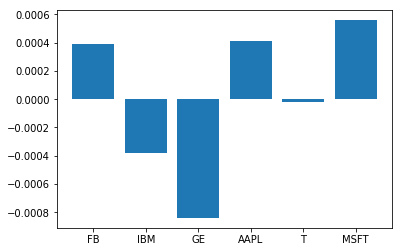

In [18]:
plt.bar(
    ['FB', 'IBM', 'GE', 'AAPL', 'T', 'MSFT'], 
    [beta_fb, beta_ibm, beta_ge, beta_aapl, beta_t, beta_msft]
)

## Bonus Round: Make a case, using data, for investing in one of these four stocks.